## Bibliotecas

Importação das bibliotecas necessárias para análise exploratória e limpeza de dados. Também é feita a importação do módulo `src` para acesso à funções desenvolvidas no módulo anterior.


In [352]:
import os, sys
# Análise exploratória e limpeza de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Processamento de dados e modelagem
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Configuração do caminho do arquivo
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.load_data import load_config, load_data

import warnings
warnings.filterwarnings('ignore')

Primeiramente, vamos carregar os dados e configurar o caminho do arquivo. O print mostra as dimensões do dataset, de modo que tenhamos uma ideia de como o dataset está estruturado no que diz respeito ao número de entradas e variáveis.


In [353]:
# config_path = os.path.join(os.getcwd(), '..', 'config', 'config.json')
config = load_config('../config/config.json')
df = load_data(config)

print('Dimensões do dataset',
      f'\nEntradas: {df.shape[0]}',
      f'\nVariáveis: {df.shape[1]}'
      )

print('\nNome das colunas:', df.columns.tolist())

Dimensões do dataset 
Entradas: 45000 
Variáveis: 43

Nome das colunas: ['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'email', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_first_name', 'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud']


### Dicionário de variáveis

O dicionário de variáveis é uma ferramenta essencial para entender o significado de cada variável do dataset. Abaixo temos as variáveis do dataset, com uma breve descrição de cada uma.

- `ids`: Identificadores únicos dos clientes (strings aleatórias)
- `score_1, score_2`: Variáveis de pontuação codificadas (significado específico desconhecido)
- `score_3, score_4, score_5, score_6`: Pontuações numéricas do cliente, potencialmente relacionadas à inadimplência
- `risk_rate`: Probabilidade estimada de risco do cliente (valores entre 0 e 1)
- `last_amount_borrowed`: Valor do último empréstimo do cliente
- `last_borrowed_in_months`: Meses desde o último empréstimo (36, 60 ou nan)
- `credit_limit`: Limite de crédito do cliente
- `income`: Renda anual do cliente
- `state, zip, channel, job_name, real_state`: Dados demográficos e profissionais codificados
- `n_bankruptcies`: Número de falências registradas (0-5 ou nan)
- `n_defaulted_loans`: Número de empréstimos inadimplentes (0-5 ou nan)
- `n_accounts`: Número de contas do cliente (inteiro)
- `n_issues`: Número de problemas registrados (inteiro)
- `application_time_applied`: Tempo de processamento da aplicação (em horas)
- `email`: Provedor de e-mail do cliente
- `external_data_provider_credit_checks_last_2_year`: Verificações de crédito nos últimos 2 anos (0 ou nan)
- `external_data_provider_credit_checks_last_year`: Verificações de crédito no último ano (0, 1 ou nan)
- `external_data_provider_credit_checks_last_month`: Verificações de crédito no último mês (0-3)
- `external_data_provider_email_seen_before`: Indicador de e-mail previamente registrado (-999, nan ou outros valores)
- `external_data_provider_first_name`: Primeiro nome do cliente
- `external_data_provider_fraud_score`: Pontuação de risco de fraude (fora do escopo do projeto)
- `lat_lon`: Coordenadas geográficas (latitude, longitude)
- `marketing_channel`: Origem da aquisição do cliente (e-mail, rádio, site, etc.)
- `profile_phone_number`: Número de telefone do cliente
- `reported_income`: Renda declarada pelo cliente (float)
- `shipping_state`: Estado de residência do cliente (ex: BR-MG, BR-SP)
- `shipping_zip_code`: CEP do cliente (inteiro)
- `profile_tags`: Tags de identificação do cliente (dicionário em formato string)
- `user_agent`: Informações sobre o dispositivo/navegador usado
- `target_fraud`: Indicador de transação fraudulenta (fora do escopo do projeto)
- `target_default`: Variável alvo - indica se o cliente é inadimplente (True, False ou nan)

### Análise da variável-alvo

A variável-alvo `target_default` é a variável que queremos prever. Ela indica se o cliente é inadimplente (True) ou não (False). Vamos analisar a distribuição dessa variável.

In [354]:
print('Valores na variável target_default:', df['target_default'].unique())


Valores na variável target_default: [False True nan]


A variável target_default possui 3 valores distintos. Um deles se trata de valores nulos. Vamos ver como está a distribuição desses valores.


In [355]:
target_na = df['target_default'].isna().sum()

print(f'Valores nulos na variável target_default: {target_na}')
print(f'Proporção de nulos na variável target_default: {(target_na * 100/ df.__len__()).round(2)} %')

Valores nulos na variável target_default: 3259
Proporção de nulos na variável target_default: 7.24 %


Temos uma proporção de 7,24% de valores nulos no alvo. Apesar de não ser uma quantidade desprezível de valores nulos, ela não é suficiente para causar um problema na modelagem. Vamos remover essas entradas do dataset.


In [356]:
def remove_target_nan(df: pd.DataFrame, verbose=True):
    df_clean = df.copy()

    nan_idx = df_clean.loc[df_clean['target_default'].isna()].index

    df_clean.drop(index = nan_idx, axis = 0, inplace = True)
    if verbose:
        print('Valores nulos removidos!')

    return df_clean

In [357]:
df_clean = remove_target_nan(df)

Valores nulos removidos!


Agora podemos olhar para a distribuição da variável target_default, visualizando as proporções de cada classe sem a influência dos valores nulos.


In [358]:
print('Distribuição das classes:\n')

class_count = df_clean['target_default'].value_counts()

print(class_count)

print('\nProporção no conjunto: \n')

class_0 = (class_count.iloc[0] * 100/ df_clean.__len__()).round(2)
class_1 = (class_count.iloc[1] * 100/ df_clean.__len__()).round(2)

print(f'False: \t{class_0} %',
      f'\nTrue: \t{class_1} %')

Distribuição das classes:

target_default
False    35080
True      6661
Name: count, dtype: int64

Proporção no conjunto: 

False: 	84.04 % 
True: 	15.96 %


Fazendo uma análise dessas proporções entre as classes, vemos que se trata de uma distribuição desbalanceada. A classe False (não inadimplente) possui uma proporção de 84,04% no conjunto de dados, enquanto a classe True (inadimplente) possui apenas 15,96% de proporção.

Através de um gráfico de barras, podemos visualizar melhor a proporção entre as classes.


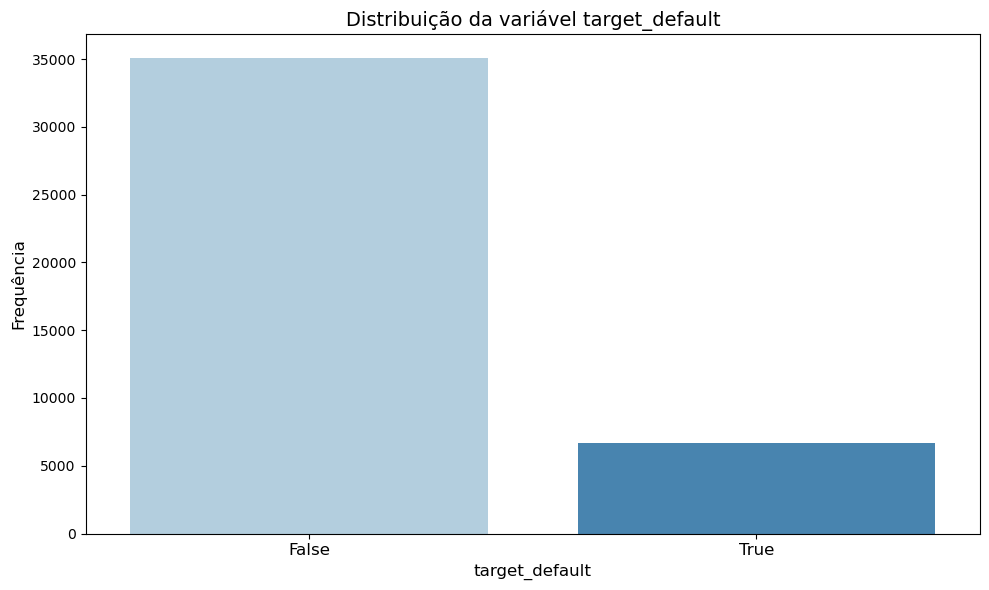

In [359]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.countplot(x = 'target_default', data = df_clean, palette = 'Blues', ax = ax)

ax.set_title('Distribuição da variável target_default', fontsize = 14)

ax.set_xlabel('target_default', fontsize = 12)
ax.set_ylabel('Frequência', fontsize = 12)

ax.set_xticklabels(['False', 'True'], fontsize = 12)

fig.tight_layout()

Podemos realizar um pré-processamento da variável target_default, criando uma nova variável binária que indica 1 para os valores True e 0 para os valores False. Esse processamento ajudará na fase de modelagem, uma vez que muitos modelos de classificação lidam melhor com variáveis binárias.

Para a codificação da variável target_default, utilizaremos o LabelEncoder da biblioteca `sklearn`.


In [360]:
def apply_label_encoder(df: pd.DataFrame, verbose=True):
    df_clean = df.copy()

    le = LabelEncoder()
    le.fit(df_clean['target_default'])

    df_clean['target_default'] = le.transform(df_clean['target_default'])
    
    if verbose and [0, 1] in df_clean['target_default'].unique():
        print('LabelEncoder aplicado!')

    return df_clean

In [361]:
df_clean = apply_label_encoder(df_clean)

LabelEncoder aplicado!


Agora temos uma variável binária que indica 1 para os valores True e 0 para os valores False.

Nesta seção, realizamos a limpeza e preparação dos dados para a modelagem, focando na variável alvo, removendo valores nulos e criando uma variável binária para a modelagem.


### Valores únicos

Outro ponto importante que devemos nos atentar é com relação à cardinalidade das variáveis. Atributos que possuem poucos valores únicos podem ser processados de modo a simplificar a representação das categorias. Por exemplo, variáveis categóricas com baixa cardinalidade podem ser codificadas usando one-hot encoding ou label encoding, dependendo da natureza da variável e do modelo a ser utilizado.

Por outro lado, variáveis com alta cardinalidade (muitos valores únicos) podem precisar de tratamentos especiais, como agrupamento de categorias menos frequentes ou uso de técnicas de embedding para reduzir a dimensionalidade. Isso ajuda a evitar problemas como overfitting e melhora a eficiência computacional do modelo.

Vamos analisar a cardinalidade das nossas variáveis para determinar quais estratégias de processamento serão mais apropriadas para cada uma delas.

In [362]:
df_clean.nunique().sort_values()[:15]

external_data_provider_credit_checks_last_2_year     1
channel                                              1
target_fraud                                         2
target_default                                       2
external_data_provider_credit_checks_last_year       2
facebook_profile                                     2
last_borrowed_in_months                              2
external_data_provider_credit_checks_last_month      4
n_defaulted_loans                                    5
real_state                                           5
email                                                6
n_bankruptcies                                       6
score_1                                              7
marketing_channel                                    9
shipping_state                                      25
dtype: int64

Para as variáveis que possuem mais do que um valor único, iremos aplicar posteriormente o TargetEncoder. Para as que possuem apenas uma única categoria, iremos remover do conjunto de dados.


### Tratamento de valores nulos

Seguindo o processo de tratamento e limpeza dos dados, vamos verificar os valores nulos no conjunto de dados como um todo.

In [363]:
na_values = (df_clean.isna().sum() / len(df_clean)).sort_values(ascending = False)

print('Quantidade de valores nulos (%):\n')
print(na_values.head(20).apply(lambda x: f'{x:.2%}'))

Quantidade de valores nulos (%):

target_fraud                                        96.75%
last_amount_borrowed                                66.14%
last_borrowed_in_months                             66.14%
ok_since                                            58.61%
external_data_provider_credit_checks_last_2_year    50.38%
external_data_provider_credit_checks_last_year      33.59%
credit_limit                                        31.41%
n_issues                                            26.17%
facebook_profile                                     9.95%
marketing_channel                                    7.93%
job_name                                             6.27%
external_data_provider_email_seen_before             5.00%
lat_lon                                              3.02%
user_agent                                           1.57%
n_bankruptcies                                       0.32%
n_defaulted_loans                                    0.03%
reason                

Vamos visualizar as variáveis que não possuem nenhum valor nulo:

In [364]:
na_values[-26:]

state                                              0.0
score_5                                            0.0
score_1                                            0.0
profile_tags                                       0.0
shipping_zip_code                                  0.0
shipping_state                                     0.0
reported_income                                    0.0
profile_phone_number                               0.0
score_2                                            0.0
score_3                                            0.0
external_data_provider_fraud_score                 0.0
external_data_provider_first_name                  0.0
score_4                                            0.0
external_data_provider_credit_checks_last_month    0.0
zip                                                0.0
score_6                                            0.0
email                                              0.0
application_time_in_funnel                         0.0
applicatio

Temos portanto 26 variáveis que não possuem entradas ausentes, enquanto 17 possuem algum percentual de valores ausentes. Dentre estas, temos variáveis que não fazem parte do escopo do projeto, mas dizem respeito à detecção de fraudes (`target_fraud` e `external_data_provider_fraud_score`).

Estas e outras que possuem pouco poder preditivo, ou são de difícil interpretabilidade, serão removidas, de modo que não precisaremos nos preocupar com seus valores ausentes.

#### Remover colunas

A função abaixo é responsável por remover todos os atributos cujos dados são de difícil interpretação ou baixo poder preditivo. 

Algumas variáveis codificadas também serão removidas pela questão da intepretabilidade.

In [365]:
cols_to_drop = [
        'target_fraud', 'external_data_provider_fraud_score',
        'ids', 'email', 'external_data_provider_first_name',
        'profile_phone_number', 'profile_tags', 'facebook_profile',
        'user_agent', 'state', 'zip', 'job_name', 'channel',
        'shipping_zip_code', 
        'external_data_provider_credit_checks_last_month',
        'application_time_applied', 'reason', 'real_state', 
        'external_data_provider_credit_checks_last_year',
        'external_data_provider_credit_checks_last_2_year'
        ]

In [366]:
def remove_cols(df: pd.DataFrame, cols_to_drop: list, verbose=True) -> pd.DataFrame:
    """
    Remove colunas especificadas do DataFrame e imprime as novas dimensões.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada.
    
    Returns:
        pd.DataFrame: DataFrame com as colunas especificadas removidas.
    """
    # Criar cópia para backup
    df_cleaned = df.copy()

    # Remover colunas com valores ausentes
    df_cleaned = df.drop(columns=cols_to_drop, axis=1)
    # Remover entradas ausentes na coluna lat_lon
    idx = df_cleaned.loc[df_cleaned['lat_lon'].isna()].index
    df_cleaned = df_cleaned.drop(index = idx, axis = 0)
    df_cleaned = df_cleaned.reset_index(drop = True)
    
    if verbose:
        # Imprimir dimensões do conjunto limpo
        print(
            'Dimensão do conjunto limpo:',
            f'\nEntradas: {df_cleaned.shape[0]}',
            f'\nVariáveis: {df_cleaned.shape[1]}'
        )
        
        # Print das colunas removidas
        print(f'\nColunas removidas: {", ".join(cols_to_drop)}')
    
    return df_cleaned

In [367]:
df_clean = remove_cols(df_clean, cols_to_drop)

Dimensão do conjunto limpo: 
Entradas: 40479 
Variáveis: 23

Colunas removidas: target_fraud, external_data_provider_fraud_score, ids, email, external_data_provider_first_name, profile_phone_number, profile_tags, facebook_profile, user_agent, state, zip, job_name, channel, shipping_zip_code, external_data_provider_credit_checks_last_month, application_time_applied, reason, real_state, external_data_provider_credit_checks_last_year, external_data_provider_credit_checks_last_2_year


In [368]:
def nan_report(df: pd.DataFrame):
    # Verificar valores NA
    na_counts = df.isna().sum()
    na_percentages = (na_counts / len(df)) * 100

    # Criar um DataFrame para exibir contagens e percentuais de NA
    na_summary = pd.DataFrame({
        'Contagem NaN': na_counts,
        'Percentual NaN': na_percentages.round(2)
    })

    # Ordenar o resumo pelo percentual de NA em ordem decrescente
    na_summary_sorted = na_summary.sort_values('Percentual NaN', ascending=False)

    # Exibir o resumo
    print("Resumo dos valores NaN:")
    print(na_summary_sorted)

In [369]:
nan_report(df_clean)

Resumo dos valores NaN:
                                          Contagem NaN  Percentual NaN
last_amount_borrowed                             26783           66.17
last_borrowed_in_months                          26783           66.17
ok_since                                         23705           58.56
credit_limit                                     12722           31.43
n_issues                                         10603           26.19
marketing_channel                                 3211            7.93
external_data_provider_email_seen_before          2026            5.01
n_bankruptcies                                     133            0.33
n_defaulted_loans                                   12            0.03
target_default                                       0            0.00
reported_income                                      0            0.00
lat_lon                                              0            0.00
application_time_in_funnel                           

#### Imputar valores

Para tratar o restante dos valores nulos, iremos imputar valores da mediana ou zero nas variáveis numéricas. Para as categóricas, iremos imputar valores relacionados à moda do atributo.

#### Variáveis numéricas

As variáveis para imputar a mediana são:

* `ok_since`
* `n_issues`
* `credit_limit`
* `external_data_provider_email_seen_before`

Variáveis que iremos imputar o valor zero:

* `last_amount_borrowed`
* `last_borrowed_in_months`
* `n_bankrupticies`
* `n_defaulted_loans`

> Para maiores detalhes da escolha de quais atributos imputar mediana, veja etapa de AED.

In [370]:
def numerical_imputer(df: pd.DataFrame, verbose=True) -> pd.DataFrame:
    df_num = df.copy()
    # Instanciar o objeto para imputar valores da mediana
    num_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

    # Selecionando as colunas para preencher com zero
    cols_to_fill_0 = ['last_amount_borrowed', 'last_borrowed_in_months', 'n_defaulted_loans', 'n_bankruptcies']
    df_num.loc[:, cols_to_fill_0] = df_num.loc[:, cols_to_fill_0].fillna(value = 0)

    # Filtrando os atributos numéricos
    num_cols = df_num.select_dtypes(exclude = 'O').columns
    # Filtrar colunas numéricas com valores NaN
    nan_cols = [col for col in num_cols if df_num[col].isna().any()]
    
    if nan_cols:
        # Ajustar e transformar apenas colunas com valores NaN
        num_imputer = num_imputer.fit(df_num.loc[:, nan_cols])
        df_num.loc[:, nan_cols] = num_imputer.transform(df_num.loc[:, nan_cols])
        if verbose:
            print(f"Colunas imputadas: {', '.join(nan_cols)}")
    elif verbose:
        print("Nenhuma coluna numérica com valores NaN encontrada.")
    
    return df_num

In [371]:
df_proc = numerical_imputer(df_clean)

Colunas imputadas: credit_limit, ok_since, n_issues, external_data_provider_email_seen_before


In [372]:
nan_report(df_proc)

Resumo dos valores NaN:
                                          Contagem NaN  Percentual NaN
marketing_channel                                 3211            7.93
target_default                                       0            0.00
ok_since                                             0            0.00
reported_income                                      0            0.00
lat_lon                                              0            0.00
external_data_provider_email_seen_before             0            0.00
application_time_in_funnel                           0            0.00
n_issues                                             0            0.00
n_accounts                                           0            0.00
n_defaulted_loans                                    0            0.00
n_bankruptcies                                       0            0.00
income                                               0            0.00
score_1                                              

Note que agora só temos a variável categórica `marketing_channel` e o atributo referente à latitude e longitude para imputar valores.

#### Variáveis categóricas

In [373]:
def cat_imputer(df: pd.DataFrame, verbose=True) -> pd.DataFrame:
    df_cat = df.copy()
    # Instanciando o objeto para imputar valores baseados na moda
    cat_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

    # Filtro para variáveis categóricas
    cat_cols = df_cat.select_dtypes(include = 'O').columns

    if verbose:
        print(f'Colunas categóricas: {cat_cols}')
    nan_cols = [col for col in cat_cols if df_cat[col].isna().any()]

    if nan_cols:
        # Ajustar e transformar apenas colunas com valores NaN
        cat_imputer = cat_imputer.fit(df_cat.loc[:, nan_cols])
        df_cat.loc[:, nan_cols] = cat_imputer.transform(df_cat.loc[:, nan_cols])
        if verbose:
            print(f"Colunas imputadas: {', '.join(nan_cols)}")
    elif verbose:
        print("Nenhuma coluna categórica com valores NaN encontrada.")

    return df_cat

In [374]:
df_proc = cat_imputer(df_proc)

Colunas categóricas: Index(['score_1', 'score_2', 'lat_lon', 'marketing_channel', 'shipping_state'], dtype='object')
Colunas imputadas: marketing_channel


In [375]:
def impute_nans(df: pd.DataFrame, verbose = True) -> pd.DataFrame:
    df_proc = df.copy()
    # Imputar atributos numéricos
    df_proc = numerical_imputer(df_proc, verbose = verbose)
    # Imputar atributos categóricos
    df_proc = cat_imputer(df_proc, verbose = verbose)

    return df_proc

In [376]:
nan_report(df_proc)

Resumo dos valores NaN:
                                          Contagem NaN  Percentual NaN
target_default                                       0             0.0
ok_since                                             0             0.0
reported_income                                      0             0.0
marketing_channel                                    0             0.0
lat_lon                                              0             0.0
external_data_provider_email_seen_before             0             0.0
application_time_in_funnel                           0             0.0
n_issues                                             0             0.0
n_accounts                                           0             0.0
n_defaulted_loans                                    0             0.0
n_bankruptcies                                       0             0.0
income                                               0             0.0
score_1                                              

Todas as entradas com valores nulos foram tratadas.

### Feature Engerineering

In [377]:
df_proc['lat_lon']

0          (-29.151545708122246, -51.1386461804385)
1         (-19.687710705798963, -47.94151536525154)
2        (-28.748023890412284, -51.867279334353995)
3         (-17.520650158450454, -39.75801139933186)
4         (-16.574259446978008, -39.90990074785962)
                            ...                    
40474    (-22.486891256430695, -44.909010639017616)
40475     (-12.881449687799003, -46.43545330884514)
40476    (-23.888982131800983, -50.645313285616645)
40477       (-5.14769885524928, -37.98386842511541)
40478      (-23.13900985246712, -52.29465769715389)
Name: lat_lon, Length: 40479, dtype: object

#### Latitude e Longitude

In [378]:
def apply_feature_engineering(df: pd.DataFrame, verbose = True) -> pd.DataFrame:
    import time
    df_fe = df.copy()

    # Criar os dois novos atributos
    df_fe[['latitude', 'longitude']] = df_fe['lat_lon'].str.strip('()').str.split(',', expand= True)

    # Transformando o tipo das colunas novas para float
    df_fe['latitude'] = df_fe['latitude'].astype(float)
    df_fe['longitude'] = df_fe['longitude'].astype(float)

    time.sleep(2)
    if 'latitude' in df_fe.columns and 'longitude' in df_fe.columns:
        # Remover a coluna original e a última entrada criada
        df_fe.drop(columns=['lat_lon'], axis=1, inplace=True)
        if verbose:
            print('Atributos "latitude" e "longitude" criados!')
    elif verbose:
        print('Erro: Variáveis não criadas.')

    # Padronizar as entradas em shipping state (BR-RS -> RS)
    df_fe['shipping_state'] = df_fe['shipping_state'].str.split('-', expand = True)[1]

    return df_fe

In [379]:
df_final = apply_feature_engineering(df_proc)

Atributos "latitude" e "longitude" criados!


### Processamento e Limpeza de Dados Completos

Nesta seção, realizamos uma limpeza e processamento abrangentes dos dados. Criamos uma função `process_data` que encapsula todas as etapas de limpeza e transformação desenvolvidas anteriormente. Esta função realiza as seguintes operações:

1. Remove valores nulos da variável-alvo
2. Aplica codificação de rótulos à variável-alvo
3. Remove colunas desnecessárias
4. Imputa valores ausentes em variáveis numéricas e categóricas
5. Aplica engenharia de features, incluindo a separação de coordenadas geográficas

A função `process_data` recebe o DataFrame bruto como entrada e retorna um DataFrame final limpo e processado, pronto para análises avançadas e modelagem. Esta abordagem centralizada facilita a reprodutibilidade e a manutenção do nosso pipeline de processamento de dados.

In [380]:
def process_data(df):
    """
    Agrega todas as etapas de limpeza e processamento de dados.
    
    Args:
    df (pd.DataFrame): O DataFrame de entrada bruto.
    
    Returns:
    pd.DataFrame: O DataFrame processado e limpo com colunas de engenharia de features.
    """
    # Remove valores NaN da variável alvo
    df = remove_target_nan(df, verbose=False)
    
    # Aplica codificação de rótulos à variável alvo
    df = apply_label_encoder(df, verbose=False)
    
    # Remove colunas desnecessárias
    cols_to_drop = [
        'target_fraud', 'external_data_provider_fraud_score',
        'ids', 'email', 'external_data_provider_first_name',
        'profile_phone_number', 'profile_tags', 'facebook_profile',
        'user_agent', 'state', 'zip', 'job_name', 'channel',
        'shipping_zip_code', 
        'external_data_provider_credit_checks_last_month',
        'application_time_applied', 'reason', 'real_state', 
        'external_data_provider_credit_checks_last_year',
        'external_data_provider_credit_checks_last_2_year'
        ]
    df = remove_cols(df, cols_to_drop, verbose=False)
    
    # Imputa valores ausentes
    df = impute_nans(df, verbose=False)
    
    # Aplica feature engineering
    df = apply_feature_engineering(df, verbose=False)
        
    return df

In [381]:
df_final = process_data(df)

In [382]:
df_final.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_email_seen_before,marketing_channel,reported_income,shipping_state,latitude,longitude
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,18.0,18.0,444,51.0,Invite-email,57849.0,MT,-29.151546,-51.138646
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,...,0.0,14.0,14.0,346,17.0,Radio-commercial,4902.0,RS,-19.687711,-47.941515
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,10.0,10.0,6,9.0,Waiting-list,163679.0,RR,-28.748024,-51.867279
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,...,0.0,19.0,19.0,406,38.0,Waiting-list,1086.0,RN,-17.520650,-39.758011
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,...,0.0,11.0,10.0,240,46.0,Invite-email,198618.0,MT,-16.574259,-39.909901


## Resumo

Agora finalizamos a seção de limpeza e tratamento dos dados. Nesta seção realizamos os seguintes passos:

1. **Análise da Variável-Alvo (target_default):**
   - Remoção de valores nulos (7,24% do total)
   - Conversão para formato binário (0 e 1)

2. **Tratamento de Valores Nulos:**
   - Remoção de colunas com baixo poder preditivo ou difícil interpretabilidade
   - Imputação de valores para variáveis numéricas (mediana ou zero) e categóricas (moda)

3. **Feature Engineering:**
   - Separação de 'lat_lon' em 'latitude' e 'longitude'
   - Padronização de 'shipping_state'

4. **Principais Transformações:**
   - Codificação da variável-alvo
   - Tratamento de valores ausentes
   - Criação de novas features geográficas

### Funções Criadas

1. `remove_target_nan`: Remove entradas com valores nulos na variável-alvo

2. `apply_label_encoder`: Aplica LabelEncoder na variável-alvo, convertendo-a para formato binário

3. `remove_cols`: Remove colunas especificadas do DataFrame, incluindo aquelas com baixo poder preditivo

4. `nan_report`: Gera um relatório detalhado de valores nulos no DataFrame

5. `numerical_imputer`: Imputa valores em variáveis numéricas usando mediana ou zero

6. `cat_imputer`: Imputa valores em variáveis categóricas usando a moda

7. `impute_nans`: Combina a imputação de variáveis numéricas e categóricas em uma única função

8. `apply_feature_engineering`: Realiza transformações de feature engineering, incluindo a separação de coordenadas geográficas

9. `process_data`: Aplica todas as transformações de processamento e limpeza de dados, retornando o DataFrame pronto para as próximas etapas de modelagem.

Este notebook focou na preparação dos dados, abordando questões críticas como valores ausentes e engenharia de features básica, resultando em um conjunto de dados limpo e processado, pronto para análises avançadas e modelagem.